# 1. Uvod

In [37]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model
from sklearn import datasets
from sklearn import decomposition
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE

import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# 2. Učitavanje podataka i analiza podataka

In [38]:
data=pd.read_excel('Residential-Building-Data-set.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Columns: 109 entries, START YEAR to V-10
dtypes: float64(94), int64(15)
memory usage: 316.9 KB


In [39]:
data.head()

,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-1,V-2,V-3,V-4,V-5,V-6,...,V-22.4,V-23.4,V-24.4,V-25.4,V-26.4,V-27.4,V-28.4,V-29.4,V-9,V-10
0,81,1,85,1,1,3150.0,920.0,598.5,190,1010.84,...,815.50,1755.00,8002.0,60.74,54.26,2978.26,41407.0,601988.1,2200,410
1,84,1,89,4,1,7600.0,1140.0,3040.0,400,963.81,...,1316.30,8364.78,8393.0,90.95,89.79,11379.37,44835.0,929027.1,5000,1000
2,78,1,81,4,1,4800.0,840.0,480.0,100,689.84,...,765.80,1755.00,4930.0,38.70,32.04,1653.06,37933.0,377828.6,1200,170
3,72,2,73,2,1,685.0,202.0,13.7,20,459.54,...,152.25,1442.31,1456.0,9.73,8.34,686.16,8194.0,122031.7,165,30
4,87,1,90,2,1,3000.0,800.0,1230.0,410,631.91,...,2244.10,9231.76,9286.0,136.60,140.20,9821.00,48260.0,1734973.5,5500,700


In [40]:
#df["Customer_Segment"].unique()

In [41]:
X=data.drop(['START YEAR','START QUARTER','COMPLETION YEAR','COMPLETION QUARTER','V-9','V-10'],axis=1)
y=data['V-9']

In [42]:
len(y.unique())

117

In [43]:
data['START QUARTER'].unique()

array([1, 2, 3, 4], dtype=int64)

In [44]:
data['START YEAR'].unique()

array([81, 84, 78, 72, 87, 88, 76, 80, 75, 85, 86, 83, 74, 82, 77, 73, 79],
      dtype=int64)

In [45]:
data['COMPLETION YEAR'].unique()

array([85, 89, 81, 73, 90, 77, 80, 82, 75, 86, 88, 87, 76, 83, 78, 74, 84,
       79], dtype=int64)

In [46]:
data['COMPLETION QUARTER'].unique()

array([1, 4, 2, 3], dtype=int64)

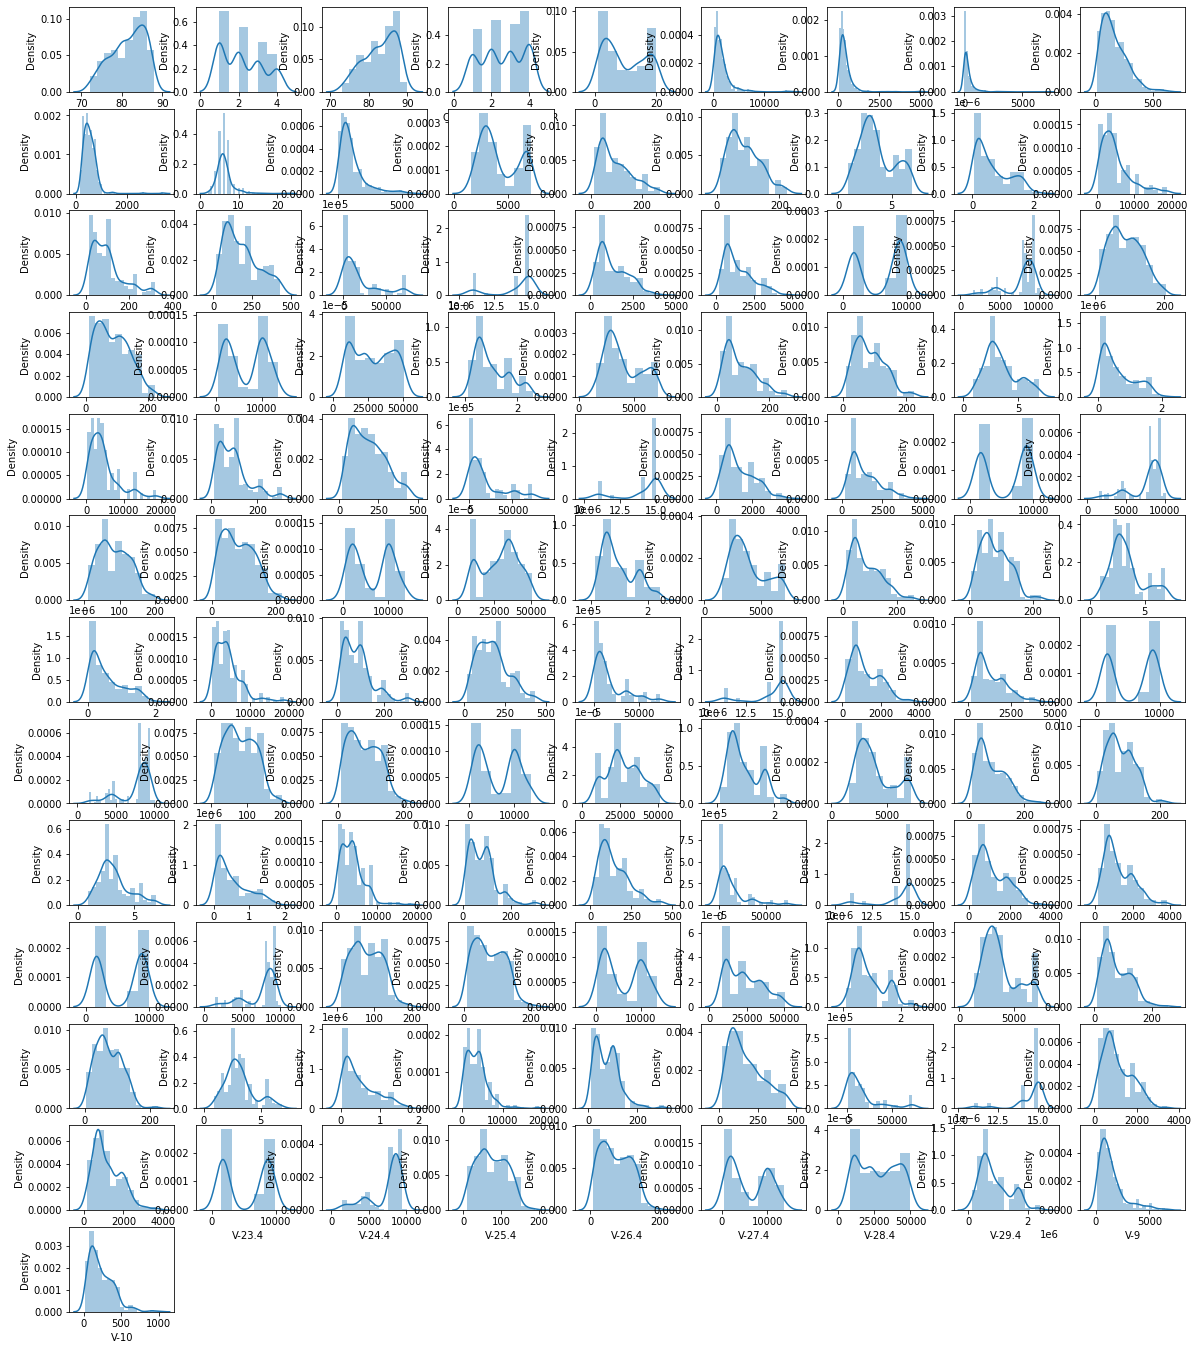

In [52]:
pos = 1
fig = plt.figure(figsize=(20,24))
for i in data.columns:
    ax = fig.add_subplot(13,9,pos)
    pos = pos + 1
    sns.distplot(data[i],ax=ax)

In [25]:
data.columns

Index(['START YEAR', 'START QUARTER', 'COMPLETION YEAR', 'COMPLETION QUARTER',
       'V-1', 'V-2', 'V-3', 'V-4', 'V-5', 'V-6',
       ...
       'V-22.4', 'V-23.4', 'V-24.4', 'V-25.4', 'V-26.4', 'V-27.4', 'V-28.4',
       'V-29.4', 'V-9', 'V-10'],
      dtype='object', length=109)

<AxesSubplot:>

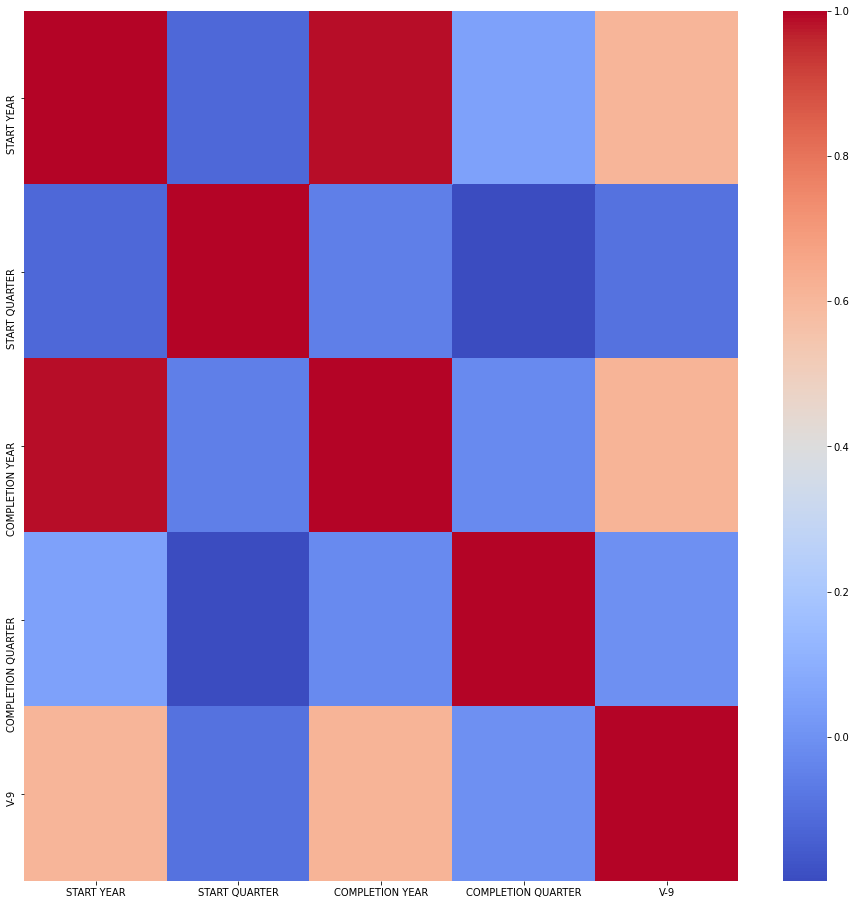

In [23]:
fig=plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111)
sns.heatmap(data[['START YEAR','START QUARTER','COMPLETION YEAR','COMPLETION QUARTER','V-9']].corr(),cmap='coolwarm')

# 3. Redukcija dimenzionalnosti

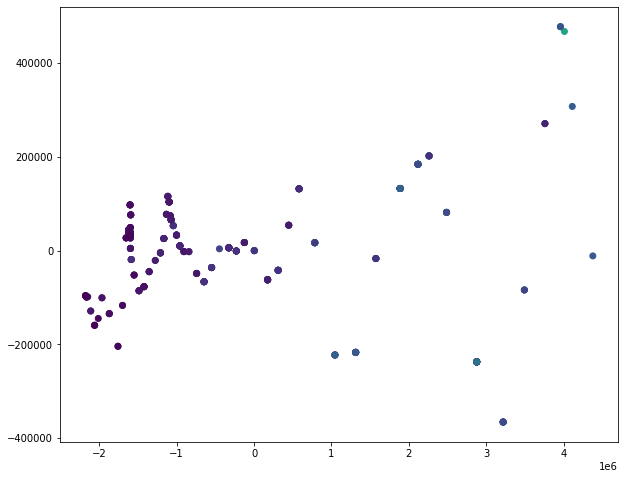

In [53]:
X_pca=decomposition.PCA(n_components='mle',svd_solver='auto').fit_transform(X)

plt.figure(figsize=(10,8))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y)
plt.show()

In [55]:
X_pca.shape

(372, 74)

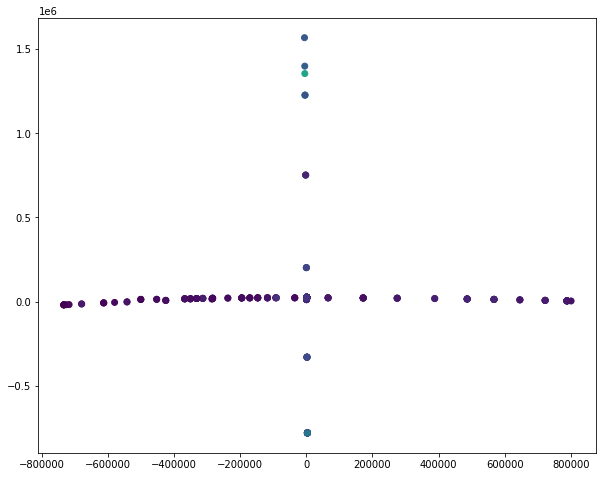

In [56]:
embedding=Isomap(n_components=2,n_neighbors=10)
X_isomap=embedding.fit_transform(X)

plt.figure(figsize=(10, 8))
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y)
plt.show()

In [57]:
X_isomap.shape

(372, 2)

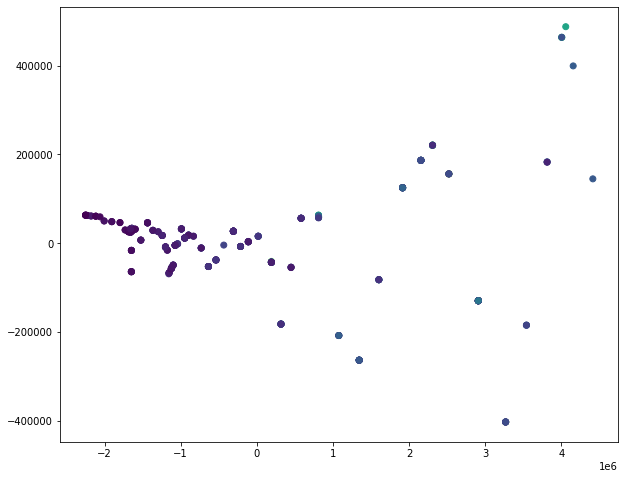

In [58]:
embedding=Isomap(n_components=2,n_neighbors=100)
X_isomap=embedding.fit_transform(X)

plt.figure(figsize=(10, 8))
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y)
plt.show()

In [59]:
X_isomap.shape

(372, 2)

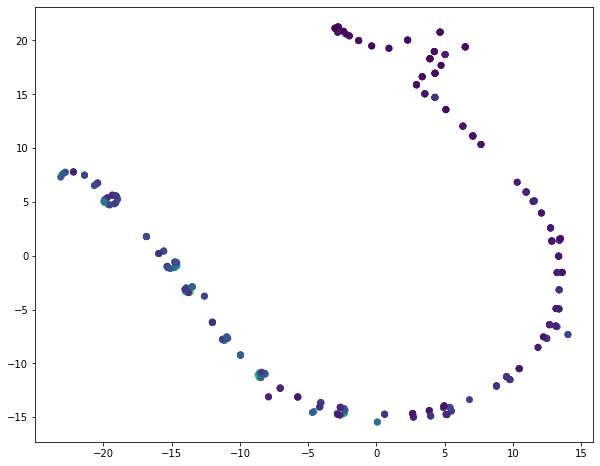

In [60]:
RS = 20150101
X_tsne = TSNE(random_state=RS,learning_rate=5,metric="euclidean").fit_transform(X)

plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.show()

In [61]:
X_tsne.shape

(372, 2)

# 4. Vizuelizacija odnosa redukcije dimenzionalnosti

<Figure size 432x288 with 0 Axes>

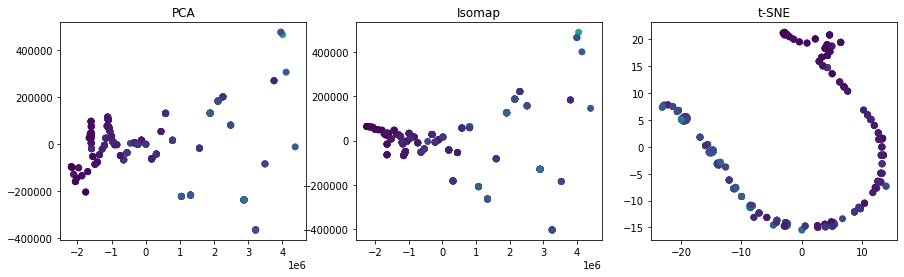

In [23]:
fig = plt.figure(figsize=(6, 4))
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
_ = ax1.set_title('PCA')
ax2.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y)
_ = ax2.set_title('Isomap')
ax3.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
_ = ax3.set_title('t-SNE')

plt.savefig('vis')
plt.show()